In [1]:
import pandas as pd
import numpy as np

# For PCA
from statsmodels.multivariate import pca

# For plotting and formatting the plots
import matplotlib.pyplot as plt
import matplotlib.ticker as mtkr
import matplotlib.dates as mdts

In [2]:
# FUNCTION TO MAKE A SCATTER PLOT WITH EQUAL AXIS LENGTHS

def plot_equal_lengths_scatters(data, x_name, y_name):
    """
    This function makes a scatter plot. It also draws dotted lines to make the x-axis and y-axis more easy to see.

    data: pandas DataFrame with dates on the index, and x- and y-axes names as columns.
    This is the data for the scatter plot.
    x_name: String; the column name of the x-axis.
    y_name: String; the column name of the y-axis.

    Return: The matplotlib.Figure and matplotlib.axes.Axes for the plot.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.grid(visible=True, linestyle='dashed', lw=0.35, color='lightgray')
    ax.axhline(y=0, color='black', linestyle=(0, (10, 6)), lw=0.5)
    ax.axvline(x=0, color='black', linestyle=(0, (10, 6)), lw=0.5)
    ax.scatter(x=data[x_name], y=data[y_name], s=15, marker='o', c='gainsboro', edgecolors='darkgrey')
    ax.set_xlabel(xlabel=x_name)
    ax.set_ylabel(ylabel=y_name)

    xlim_left, xlim_right = ax.get_xlim()
    ylim_bottom, ylim_top = ax.get_ylim()

    lim = np.max(np.abs(np.array([xlim_left, xlim_right, ylim_bottom, ylim_top])))

    ax.set_xlim(left=-lim, right=lim)
    ax.set_ylim(bottom=-lim, top=lim)

    return fig, ax

# FUNCTION TO MAKE A TIME SERIES PLOT ON ONE AXIS

def plot_timeseries_one_axis(data, y_label=None):
    """
    This function plots a time series on a single axis.

    data: pandas DataFrame with dates on the index.
    y_label: A string providing the label to use for the y-axis. Optional. Defaults to None.

    Return: The matplotlib.Figure and matplotlib.axes.Axes for the plot.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.grid(visible=True, linestyle='dashed', lw=0.35, color='lightgray')
    data.plot(ax=ax, lw=1.)
    if y_label is not None:
        ax.set_ylabel(ylabel=y_label)
    ax.xaxis.set_major_formatter(mdts.DateFormatter('%b-%y'))
    ax.legend(loc='best', framealpha=0)
    return fig, ax

# FUNCTION TO MAKE A TIME SERIES PLOT ON A PRIMARY AND A SECONDARY AXIS

def plot_timeseries_two_axes(data, cols_primary, cols_secondary, y_label_primary=None, y_label_secondary=None):
    """
    This function plots time series on a primary and secondary axis. (The maximum number of series that can be plotted
    on primary and secondary axes together is 10.)

    data: pandas DataFrame with dates on the index.
    cols_primary: A list of columns to plot on the primary y-axis.
    cols_secondary: A list of columns to plot on the secondary y-axis.
    y_label_primary: A string providing the label to use for the primary y-axis. Optional. Defaults to None.
    y_label_secondary: A string providing the label to use for the secondary y-axis. Optional. Defaults to None.

    Return: The matplotlib.Figure, and the two matplotlib.axes.Axes objects corresponding to the primary and
    secondary axes.
    """
    colours = ['black', 'silver', 'lightcoral', 'red', 'peru', 'olivedrab', 'limegreen', 'deepskyblue', 'royalblue',
               'darkorchid']

    if not isinstance(cols_primary, list):
        cols_primary = [cols_primary]
    if not isinstance(cols_secondary, list):
        cols_secondary = [cols_secondary]

    data_primary = data[cols_primary].rename(
        mapper={c: ' '.join([c, '(left)']) for c in cols_primary},
        axis=1)
    data_secondary = data[cols_secondary].rename(
        mapper={c: ' '.join([c, '(right)']) for c in cols_secondary},
        axis=1)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.grid(visible=True, linestyle='dashed', lw=0.35, color='lightgray')
    data_primary.plot(ax=ax, lw=1., color=colours[:data_primary.shape[1]])
    if y_label_primary is not None:
        ax.set_ylabel(ylabel=y_label_primary)
    ax.legend().set_visible(False)

    ax2 = ax.twinx()
    ax2.grid(visible=False)
    data_secondary.plot(ax=ax2, lw=1.,
                        color=colours[data_primary.shape[1]:(data_primary.shape[1] + data_secondary.shape[1])])
    if y_label_secondary is not None:
        ax2.set_ylabel(ylabel=y_label_secondary)
    ax2.legend().set_visible(False)

    ax.xaxis.set_major_formatter(mdts.DateFormatter('%b-%y'))
    lns = ax.lines + ax2.lines
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='best', framealpha=0)

    return fig, ax, ax2

In [3]:
MA_pca_changes = pd.read_csv('Copie de Multi-asset PCA_CHANGES=4w.csv',index_col=0)
TAM_pca_changes=pd.read_csv('Copie de Traditional Assets_Multi-asset PCA_CHANGES=4w.csv',index_col=0)
SSM_pca_changes=pd.read_csv('Copie de Traditional Assets_Multi-asset PCA_CHANGES=4w.csv',index_col=0)
factors = pd.read_csv('Copie de equity_factor_performance_data.csv',index_col=0)

<AxesSubplot:>

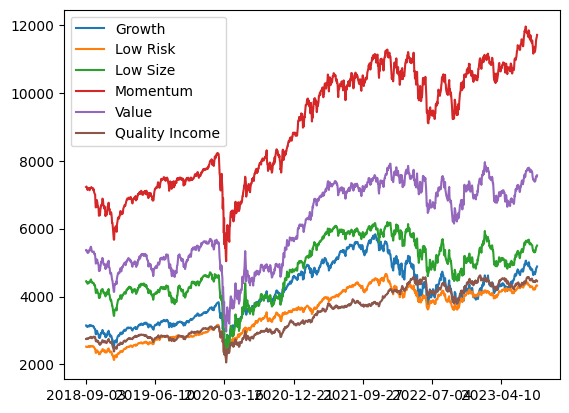

In [4]:
factors.plot()

In [5]:
MA_pca_changes_normalised = (MA_pca_changes - MA_pca_changes.mean()) / MA_pca_changes.std()

In [6]:
MA_pca_changes_normalised

,MSCI World,S&P 500,Euro Stoxx 50,Euro Stoxx Banks,CDX.IG 5Y,CDX.HY 5Y,iTraxx Europe 5Y,iTraxx Crossover 5Y,Italy - Germany 10Y,US 2Y,...,USD 3M x 10Y ATM vol.,USD 1Y x 10Y ATM vol.,USD 5Y x 5Y ATM vol.,USD 10Y x 20Y ATM vol.,US Govt.,European Govt.,US Corp. Bonds,European Corp. Bonds,US High Yield,European High Yield
2005-06-10,0.167450,0.343277,1.016358,0.552594,1.021668,0.940069,0.834451,1.310608,0.148132,0.072246,...,-0.012515,-0.059194,0.499113,-0.047339,0.637123,1.088591,0.489450,1.186558,0.785765,0.764510
2005-07-06,-0.027851,-0.153893,0.436512,0.233379,-0.263237,0.130086,0.121136,0.364581,0.006282,0.343949,...,0.066179,0.112389,-0.404934,-0.546551,-0.067827,-0.391676,-0.009991,-0.261775,0.146020,0.152702
2005-08-03,0.812959,0.700608,0.642461,0.485735,0.500203,0.598946,0.094529,-0.017407,-0.128475,1.130855,...,-0.000089,-0.154518,-0.490581,-0.667572,-0.783406,-0.477266,-0.368965,-0.483981,0.335740,0.297913
2005-08-31,-0.227815,-0.494001,-0.472199,-0.157813,0.068151,-0.272288,-0.136733,-0.078345,0.031106,-0.923843,...,-0.256881,0.067905,0.365885,0.830064,1.082408,0.970536,0.622093,0.970584,-0.040484,0.091916
2005-09-27,0.129590,-0.177045,0.639576,0.496616,-0.018805,-0.205800,0.158257,0.165498,-0.029180,1.195255,...,-0.016656,-0.103678,-0.138478,0.103937,-1.057891,-0.078988,-0.820468,-0.122343,-0.441008,-0.110103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,1.539804,1.496070,1.636306,0.834108,1.191457,1.095391,1.426497,1.353180,-0.766798,-1.460199,...,-1.180501,-0.599871,-0.557195,-0.697827,1.907484,1.389646,2.098054,1.616380,0.531607,0.839217
2022-12-28,-1.116731,-1.578400,-0.765623,0.184979,-0.674976,-0.736341,-0.118090,-0.373734,0.609143,0.187414,...,0.368531,0.373703,0.470564,0.603149,-0.691614,-3.241830,-0.447752,-1.456655,-0.350336,-0.396110
2023-01-25,1.224006,1.065746,1.542955,1.125815,0.944331,0.991104,0.861899,0.883335,-1.210078,-1.068626,...,-1.495278,-2.729024,-2.764973,-1.665996,1.995159,1.981227,1.791424,1.715428,1.002223,0.755746
2023-02-22,-0.249724,-0.224972,0.388311,0.721253,-0.397561,-0.426986,-0.107307,-0.032696,0.516941,2.666119,...,0.186292,0.488219,0.813150,1.026723,-2.117699,-1.922162,-1.646589,-0.994542,-0.788922,-0.066579


In [7]:
MA_as_dict = MA_pca_changes_normalised.to_dict(orient='list')

In [8]:
MA_as_dict['MSCI World']

[0.16745018789570582,
 -0.027851452102016748,
 0.8129588264430727,
 -0.22781471399692874,
 0.1295904170092263,
 -0.46071045064123084,
 0.8826239627219385,
 0.2530151696043128,
 0.22734694259961025,
 0.08612442100303441,
 0.4296075251773494,
 -0.026469980234970287,
 0.8887826217407834,
 -1.5408630747189147,
 0.15977078832321384,
 0.16915133407790028,
 0.32556666134265055,
 0.13987631986943977,
 0.48904246099426496,
 0.3827572908816413,
 0.37859285275259025,
 0.01733933789882815,
 0.4720567774594135,
 -0.8842224884442283,
 0.871361293268739,
 0.632783801777444,
 0.18946047736931582,
 -0.07432327124708563,
 -0.8825160309472188,
 -0.30843702027972536,
 0.8083451592912636,
 0.14177390068656984,
 -1.0932231793453875,
 0.050256426182008575,
 -1.1130179874787567,
 -0.3847788324436581,
 -0.26281049928116673,
 0.5300451007199197,
 0.5168739683715602,
 -0.3055450356078408,
 -1.776139613709757,
 -0.07732964360636048,
 -0.6956032626213875,
 -1.3469219144787525,
 -6.015469496322458,
 -2.008538661768

In [9]:
format_colour = lambda x: 'color:red' if x < 0. else 'color:lightgreen'

In [10]:
MA_pca_changes_normalised.corr().style.format(formatter='{:.0%}').applymap(format_colour)

,MSCI World,S&P 500,Euro Stoxx 50,Euro Stoxx Banks,CDX.IG 5Y,CDX.HY 5Y,iTraxx Europe 5Y,iTraxx Crossover 5Y,Italy - Germany 10Y,US 2Y,US 5Y,US 10Y,Germany 2Y,Germany 5Y,Germany 10Y,US B/E Inflation 10Y,Dollar Index,EUR/USD,USD/JPY,Precious Metals,Industrial Metals,Crude Oil,Agriculture,S&P 500 1M ATM imp. vol.,S&P 500 1M 80% imp. vol.,EUR/USD 3M ATM vol.,USD/JPY 3M ATM vol.,AUD/USD 3M ATM vol.,USD/CAD 3M ATM vol.,USD 2Y x 2Y ATM vol.,USD 3M x 10Y ATM vol.,USD 1Y x 10Y ATM vol.,USD 5Y x 5Y ATM vol.,USD 10Y x 20Y ATM vol.,US Govt.,European Govt.,US Corp. Bonds,European Corp. Bonds,US High Yield,European High Yield
MSCI World,100%,98%,89%,71%,79%,85%,71%,75%,-25%,22%,22%,17%,25%,20%,15%,60%,-53%,48%,4%,33%,54%,41%,27%,-81%,-65%,-46%,-46%,-69%,-53%,-20%,-44%,-41%,-33%,-39%,-16%,7%,53%,49%,77%,74%
S&P 500,98%,100%,85%,64%,79%,84%,69%,72%,-21%,23%,23%,17%,20%,16%,11%,57%,-42%,38%,9%,26%,49%,35%,23%,-82%,-66%,-44%,-47%,-68%,-53%,-19%,-46%,-42%,-33%,-37%,-16%,9%,52%,51%,76%,71%
Euro Stoxx 50,89%,85%,100%,86%,76%,79%,77%,79%,-35%,28%,30%,27%,28%,24%,22%,52%,-33%,30%,12%,17%,44%,36%,18%,-71%,-59%,-43%,-43%,-55%,-46%,-15%,-39%,-35%,-29%,-35%,-26%,6%,38%,46%,66%,69%
Euro Stoxx Banks,71%,64%,86%,100%,63%,65%,68%,66%,-44%,33%,36%,35%,38%,39%,36%,49%,-35%,34%,15%,7%,45%,41%,20%,-51%,-42%,-38%,-35%,-39%,-41%,-12%,-29%,-30%,-27%,-31%,-36%,-9%,19%,28%,55%,60%
CDX.IG 5Y,79%,79%,76%,63%,100%,83%,90%,78%,-30%,33%,31%,26%,24%,24%,22%,51%,-30%,28%,12%,17%,36%,26%,13%,-71%,-61%,-43%,-43%,-53%,-49%,-25%,-41%,-41%,-34%,-28%,-27%,2%,40%,42%,72%,70%
CDX.HY 5Y,85%,84%,79%,65%,83%,100%,79%,89%,-24%,28%,27%,23%,21%,19%,16%,51%,-34%,29%,5%,19%,46%,37%,18%,-70%,-56%,-45%,-43%,-63%,-52%,-19%,-46%,-41%,-31%,-35%,-22%,7%,51%,52%,81%,76%
iTraxx Europe 5Y,71%,69%,77%,68%,90%,79%,100%,87%,-46%,32%,34%,34%,27%,28%,28%,47%,-25%,23%,14%,9%,35%,24%,8%,-60%,-51%,-51%,-41%,-48%,-51%,-12%,-38%,-32%,-22%,-21%,-33%,4%,33%,44%,65%,69%
iTraxx Crossover 5Y,75%,72%,79%,66%,78%,89%,87%,100%,-34%,31%,34%,33%,27%,23%,21%,49%,-26%,21%,13%,15%,45%,36%,13%,-63%,-52%,-54%,-45%,-59%,-53%,-6%,-41%,-29%,-16%,-24%,-32%,6%,41%,51%,75%,76%
Italy - Germany 10Y,-25%,-21%,-35%,-44%,-30%,-24%,-46%,-34%,100%,-5%,-12%,-18%,-14%,-21%,-22%,-21%,25%,-29%,-13%,-2%,-16%,-10%,-2%,17%,15%,25%,8%,10%,19%,-1%,5%,7%,5%,2%,16%,-15%,-2%,-12%,-14%,-23%
US 2Y,22%,23%,28%,33%,33%,28%,32%,31%,-5%,100%,89%,76%,59%,62%,60%,34%,19%,-15%,53%,-16%,18%,25%,13%,-30%,-25%,-24%,-26%,-22%,-30%,15%,-10%,-3%,1%,-5%,-81%,-51%,-36%,-18%,14%,18%


In [11]:
# PERFORM PCA; OBTAIN THE LOADING MATRIX & SCORES

pca_model = pca.PCA(data=MA_pca_changes_normalised.values, standardize=True, normalize=False)
loadings = pca_model.loadings
scores = pca_model.scores

In [12]:
loadings2 = loadings[0:6]
loadings2 = loadings2.T

In [13]:
loadings_df = pd.DataFrame(
    index=MA_pca_changes_normalised.columns,
    columns=[' '.join(['PC', str(j + 1)]) for j in range(loadings2.shape[1])],
    #columns=[' '.join(['PC', str(j + 1)]) for j in range(MA_pca_changes_normalised.shape[1])],
    data=loadings2)



loadings_df.style.format(formatter='{:+.2f}').applymap(func=format_colour)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
MSCI World,-0.25,-0.24,-0.23,-0.20,-0.23,-0.24
S&P 500,-0.05,-0.05,-0.01,+0.05,-0.01,-0.03
Euro Stoxx 50,-0.07,-0.01,+0.02,-0.03,+0.06,+0.04
Euro Stoxx Banks,+0.02,+0.03,+0.03,-0.03,-0.00,+0.05
CDX.IG 5Y,-0.08,-0.07,-0.22,-0.26,-0.21,-0.14
CDX.HY 5Y,+0.12,+0.15,+0.06,-0.06,+0.04,+0.12
iTraxx Europe 5Y,-0.14,-0.19,-0.04,+0.20,-0.12,-0.04
iTraxx Crossover 5Y,+0.05,+0.06,+0.08,+0.09,-0.12,-0.15
Italy - Germany 10Y,-0.09,-0.08,-0.13,-0.19,+0.17,-0.00
US 2Y,+0.01,+0.05,+0.02,-0.02,+0.12,-0.03


In [33]:
scores2 = scores[0:6]

In [34]:
scores_df = pd.DataFrame(
    index=MA_pca_changes_normalised.index,
    columns=loadings_df.columns,
    data=scores2)

scores_df.style.format(formatter='{:+.4f}').applymap(func=format_colour)

ValueError: Shape of passed values is (6, 40), indices imply (232, 6)

In [19]:
# PLOT A TIME SERIES OF CUMULATED PRINCIPAL COMPONENT SCORES

scores_cum_df = scores_df.cumsum()
fig_1, ax_1 = plot_timeseries_one_axis(data=scores_cum_df)

NameError: name 'scores_df' is not defined

In [ ]:
pca = PCA()
principal_components = pca.fit_transform(MA_pca_changes)

In [ ]:
loadings_df = pd.DataFrame(pca.components_[:6], columns=MA_pca_changes.columns)
print("Loadings of the first 6 Components:")
print(loadings_df)